/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.6101 - loss: 1.4258 - val_acc: 0.8777 - val_loss: 0.5065
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8732 - loss: 0.4973 - val_acc: 0.9005 - val_loss: 0.3827
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.8920 - loss: 0.3922 - val_acc: 0.9085 - val_loss: 0.3381
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9020 - loss: 0.3521 - val_acc: 0.9134 - val_loss: 0.3116
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9083 - loss: 0.3268 - val_acc: 0.9186 - val_loss: 0.2936
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - acc: 0.9122 - loss: 0.3098 - val_acc: 0.9216 - val_loss: 0.2788
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.9192 - loss: 0.2894 - val_acc: 0.9240 - val_loss: 0.2687
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.9202 - loss: 0.2797 - val_acc: 0.9287 - val_loss: 0.2573
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - ac

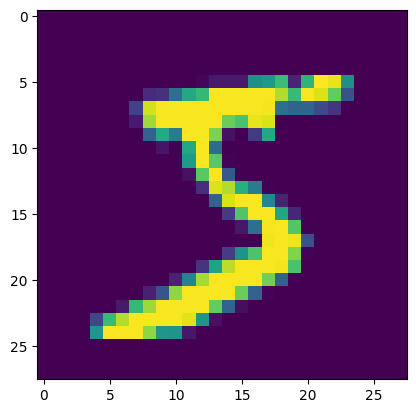

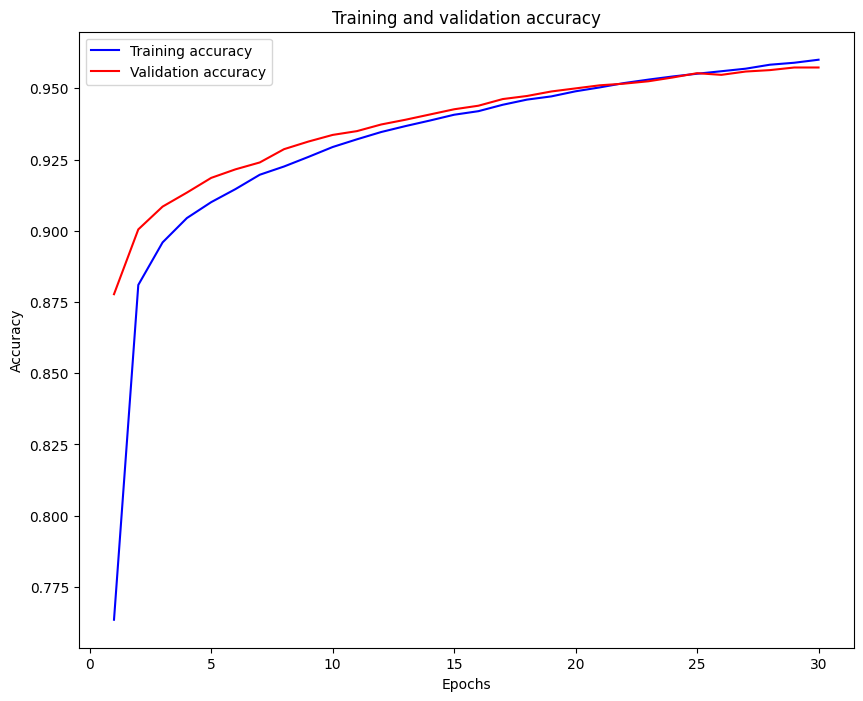

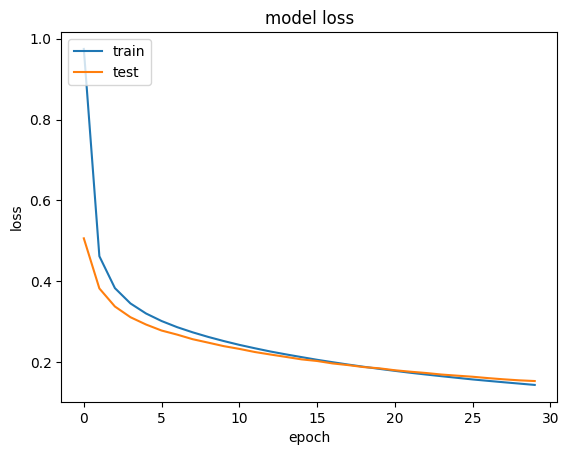

Final Training Accuracy: 0.9601
Final Validation Accuracy: 0.9573
Final Training Loss: 0.1444
Final Validation Loss: 0.1540


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(28*28,)))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.4957 - loss: 1.5835 - val_acc: 0.8723 - val_loss: 0.5542
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.8040 - loss: 0.6790 - val_acc: 0.8977 - val_loss: 0.4069
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8402 - loss: 0.5513 - val_acc: 0.9075 - val_loss: 0.3502
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8604 - loss: 0.4883 - val_acc: 0.9130 - val_loss: 0.3181
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8710 - loss: 0.4470 - val_acc: 0.9195 - val_loss: 0.2960
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8828 - loss: 0.4144 - val_acc: 0.9229 - val_loss: 0.2770
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.8883 - loss: 0.3873 - val_acc: 0.9277 - val_loss: 0.2630
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.8934 - loss: 0.3725 - val_acc: 0.9297 - val_loss: 0.2509
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - ac

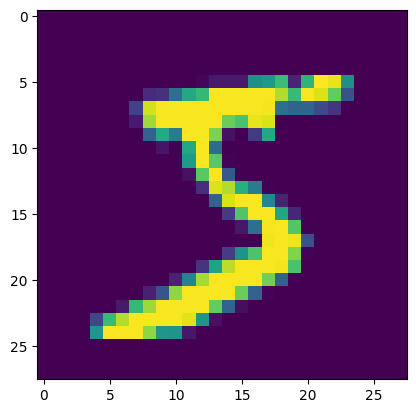

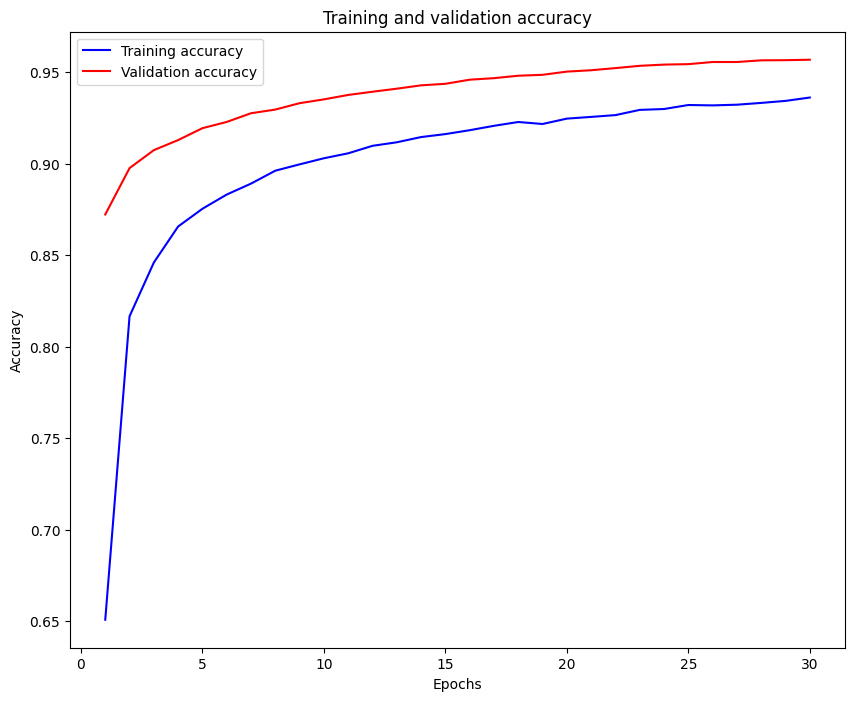

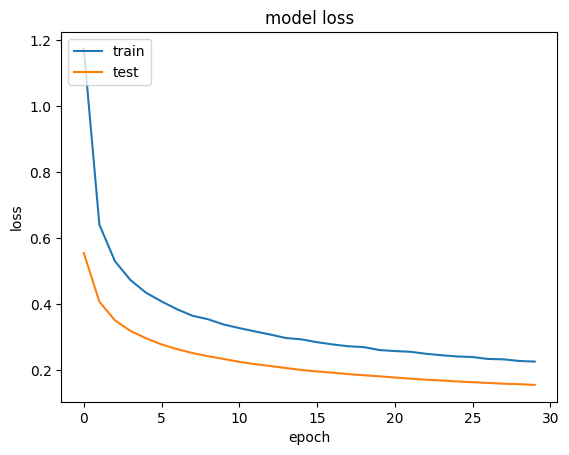

Final Training Accuracy: 0.9362
Final Validation Accuracy: 0.9569
Final Training Loss: 0.2252
Final Validation Loss: 0.1545


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(28*28,)))
md.add(Dropout(0.5))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.5622 - loss: 1.5384 - val_acc: 0.8792 - val_loss: 0.4712
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.8789 - loss: 0.4577 - val_acc: 0.9038 - val_loss: 0.3423
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.9002 - loss: 0.3578 - val_acc: 0.9114 - val_loss: 0.3017
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9118 - loss: 0.3114 - val_acc: 0.9207 - val_loss: 0.2725
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.9185 - loss: 0.2859 - val_acc: 0.9269 - val_loss: 0.2534
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9256 - loss: 0.2604 - val_acc: 0.9325 - val_loss: 0.2351
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9311 - loss: 0.2409 - val_acc: 0.9349 - val_loss: 0.2234
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.9364 - loss: 0.2215 - val_acc: 0.9415 - val_loss: 0.2106
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - ac

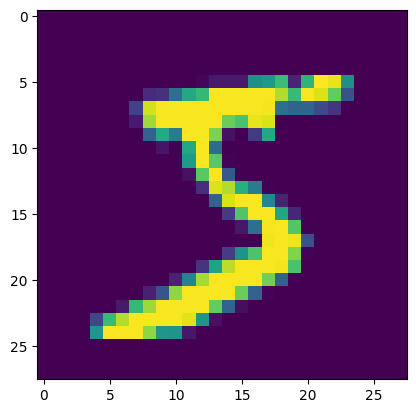

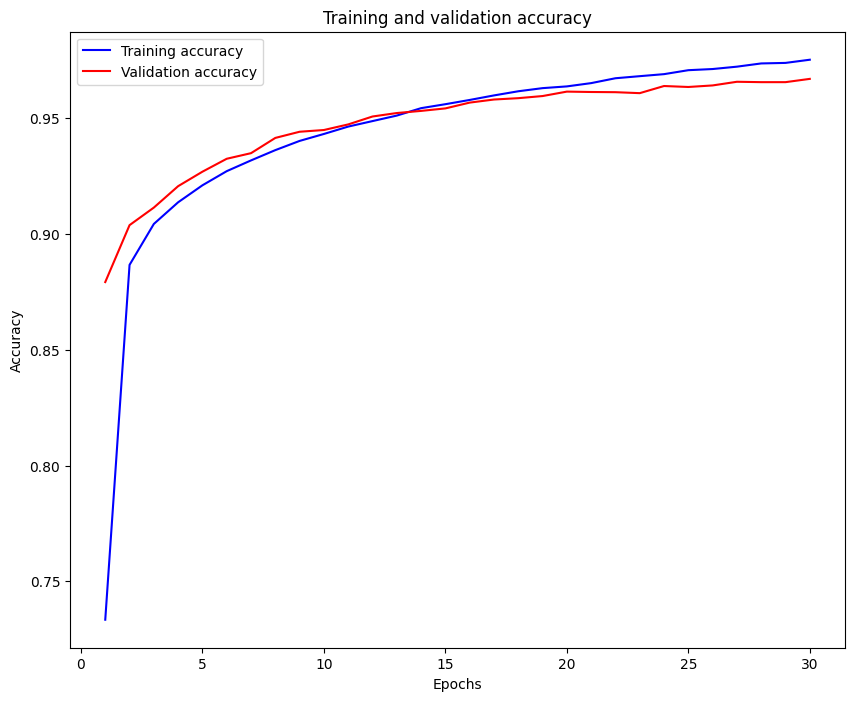

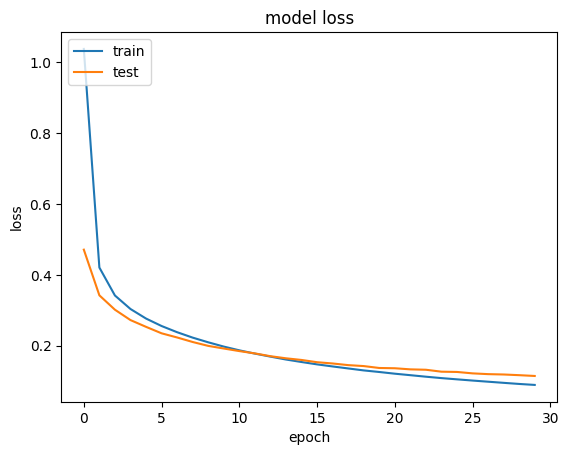

Final Training Accuracy: 0.9753
Final Validation Accuracy: 0.9670
Final Training Loss: 0.0894
Final Validation Loss: 0.1147


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(28*28,)))
md.add(Dense(64, activation='relu'))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.4323 - loss: 1.7411 - val_acc: 0.8702 - val_loss: 0.5669
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.7698 - loss: 0.7593 - val_acc: 0.8967 - val_loss: 0.3918
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.8289 - loss: 0.5837 - val_acc: 0.9112 - val_loss: 0.3268
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.8526 - loss: 0.5055 - val_acc: 0.9161 - val_loss: 0.2899
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.8725 - loss: 0.4531 - val_acc: 0.9247 - val_loss: 0.2667
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - acc: 0.8767 - loss: 0.4289 - val_acc: 0.9298 - val_loss: 0.2499
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8875 - loss: 0.3971 - val_acc: 0.9336 - val_loss: 0.2348
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.8958 - loss: 0.3719 - val_acc: 0.9371 - val_loss: 0.2203
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - ac

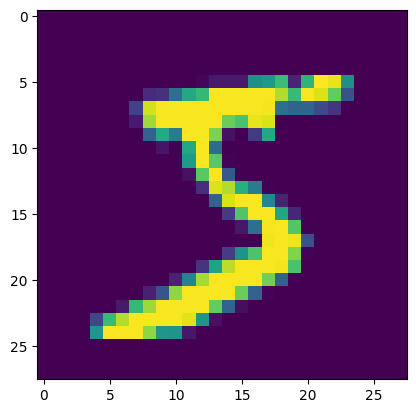

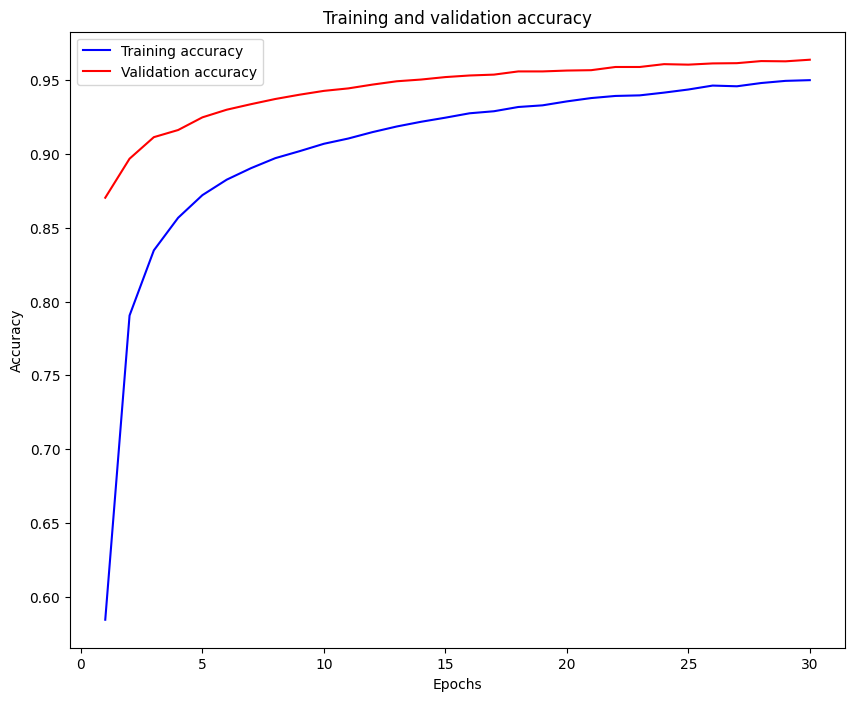

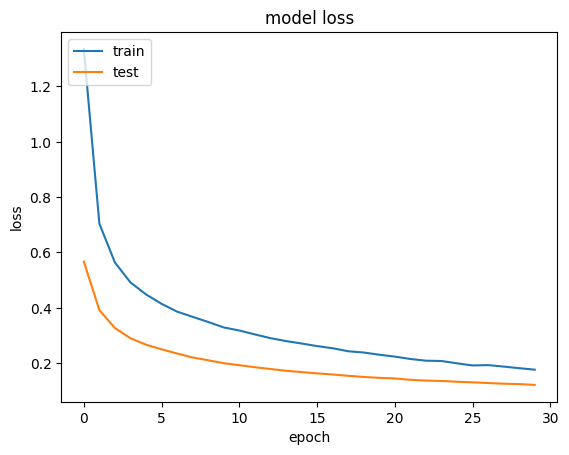

Final Training Accuracy: 0.9498
Final Validation Accuracy: 0.9637
Final Training Loss: 0.1764
Final Validation Loss: 0.1213


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(28*28,)))
md.add(Dense(64, activation='relu'))
md.add(Dropout(0.5))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.5063 - loss: 1.6492 - val_acc: 0.8731 - val_loss: 0.4642
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.8764 - loss: 0.4439 - val_acc: 0.9053 - val_loss: 0.3259
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.9055 - loss: 0.3294 - val_acc: 0.9182 - val_loss: 0.2800
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.9173 - loss: 0.2893 - val_acc: 0.9266 - val_loss: 0.2488
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.9241 - loss: 0.2645 - val_acc: 0.9341 - val_loss: 0.2261
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.9315 - loss: 0.2335 - val_acc: 0.9400 - val_loss: 0.2093
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.9400 - loss: 0.2098 - val_acc: 0.9423 - val_loss: 0.1992
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - acc: 0.9441 - loss: 0.1928 - val_acc: 0.9466 - val_loss: 0.1833
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - ac

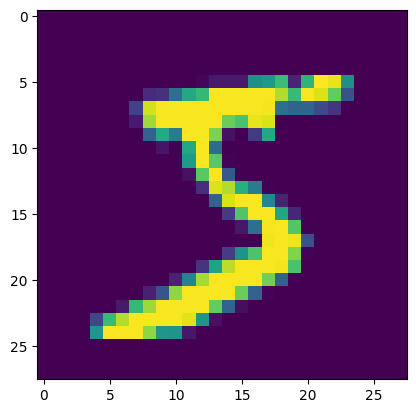

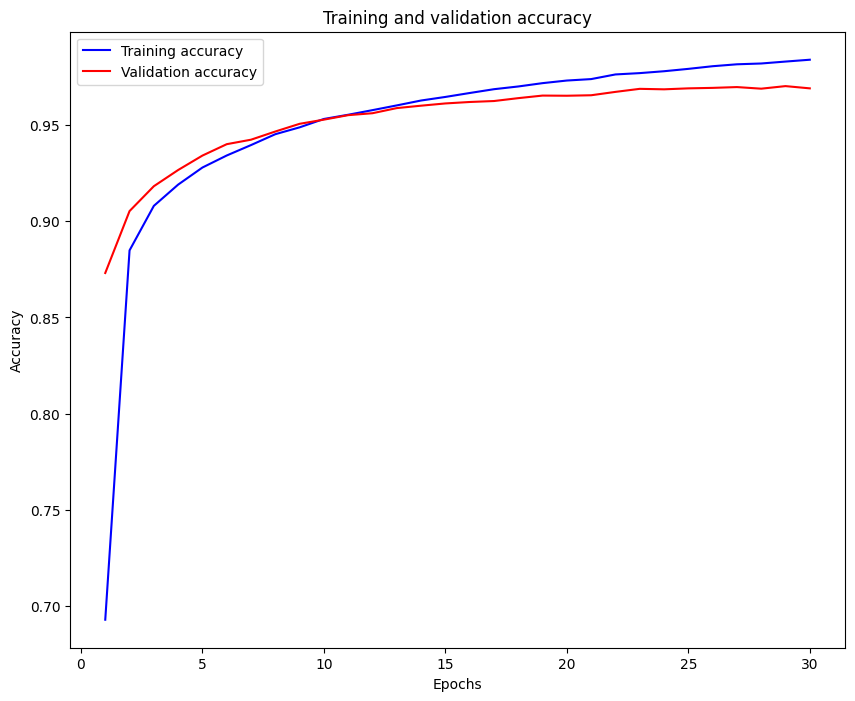

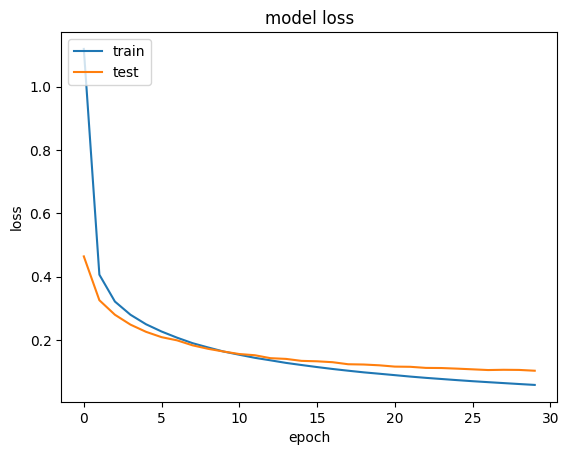

Final Training Accuracy: 0.9839
Final Validation Accuracy: 0.9690
Final Training Loss: 0.0585
Final Validation Loss: 0.1033


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(28*28,)))
md.add(Dense(64, activation='relu'))
md.add(Dense(32, activation='relu'))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.3249 - loss: 1.9228 - val_acc: 0.8560 - val_loss: 0.6960
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.7066 - loss: 0.9369 - val_acc: 0.8993 - val_loss: 0.4090
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.7956 - loss: 0.6857 - val_acc: 0.9113 - val_loss: 0.3331
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - acc: 0.8236 - loss: 0.6030 - val_acc: 0.9212 - val_loss: 0.2896
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.8449 - loss: 0.5341 - val_acc: 0.9277 - val_loss: 0.2598
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - acc: 0.8587 - loss: 0.4866 - val_acc: 0.9325 - val_loss: 0.2424
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.8707 - loss: 0.4536 - val_acc: 0.9372 - val_loss: 0.2250
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.8767 - loss: 0.4283 - val_acc: 0.9420 - val_loss: 0.2071
Epoch 9/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - ac

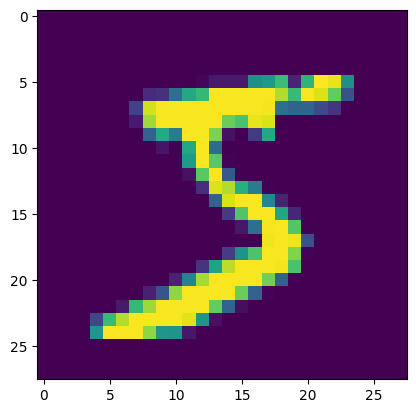

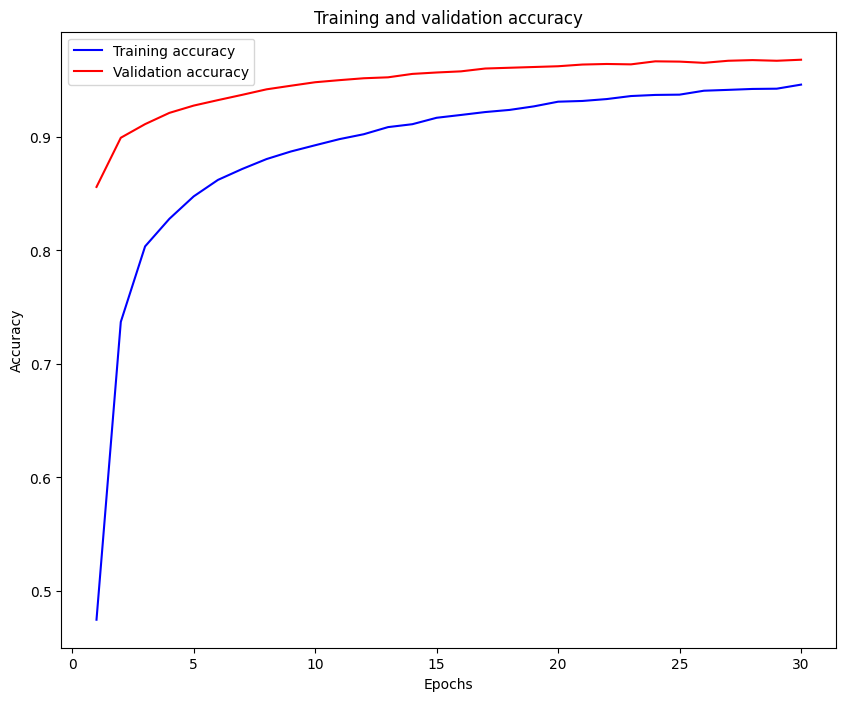

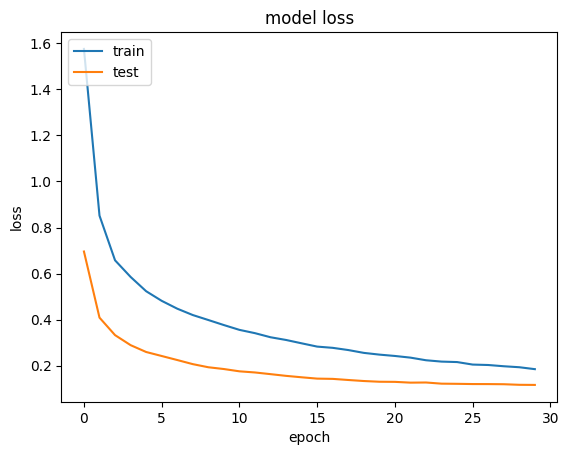

Final Training Accuracy: 0.9461
Final Validation Accuracy: 0.9681
Final Training Loss: 0.1853
Final Validation Loss: 0.1169


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. 데이터셋 불러오기
from tensorflow.keras.datasets.mnist import load_data
(train_x, train_y), (test_x, test_y) = load_data()

# 2-1. 데이터 확인하기
train_x.shape, train_y.shape

test_x.shape, test_y.shape

# 2-2. 이미지 확인하기
from PIL import Image
img = train_x[0]

import matplotlib.pyplot as plt
img1 = Image.fromarray(img,mode ='L')
plt.imshow(img1)

train_y[0] # 첫번째 데이터 확인

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 3차원 -> 2차원 (데이터를 2차원 형태로 변환: 입력 데이터가 선형 모델에서는 벡터 형태)
train_x1 = train_x.reshape(60000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값의 크기 조절 : 0~1 사이 값으로 반환
train_x2 = train_x1 /255
test_x2 = test_x1 /255

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(28*28,)))
md.add(Dense(64, activation='relu'))
md.add(Dense(32, activation='relu'))
md.add(Dropout(0.5))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습 진행
# 5-1. 모델 compile : 손실 함수, 최적화 함수, 측정 함수 설정
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 모델 학습 : 학습 횟수, batch_size 검증용 데이터 설정
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


acc=hist.history['acc']
val_acc=hist.history['val_acc']
epoch=np.arange(1, len(acc)+1)

# 학습결과 분석 : 학습 곡선 그리기
plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


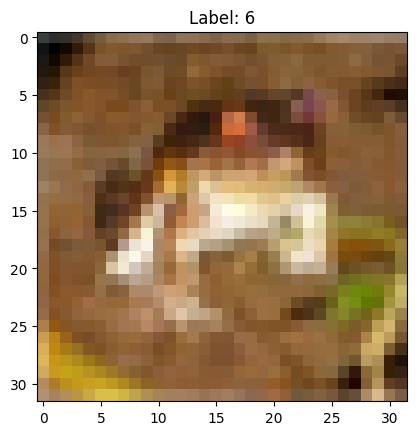

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.2486 - loss: 2.0663 - val_acc: 0.3259 - val_loss: 1.8641
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.3629 - loss: 1.8110 - val_acc: 0.3896 - val_loss: 1.7804
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.3931 - loss: 1.7342 - val_acc: 0.4012 - val_loss: 1.7202
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4075 - loss: 1.6875 - val_acc: 0.4112 - val_loss: 1.6899
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.4216 - loss: 1.6520 - val_acc: 0.4211 - val_loss: 1.6607
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - acc: 0.4369 - loss: 1.6136 - val_acc: 0.4133 - val_loss: 1.6648
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.4425 - loss: 1.5918 - val_acc: 0.4275 - val_loss: 1.6369
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.4473 - loss: 1.5730 - val_acc: 0.4331 - val_loss: 1.6117
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - 

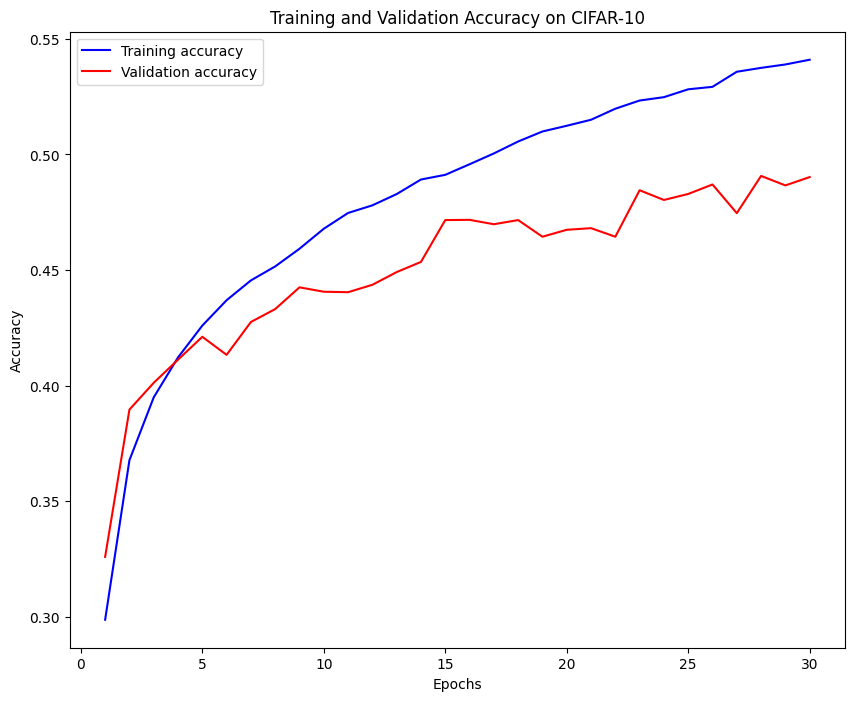

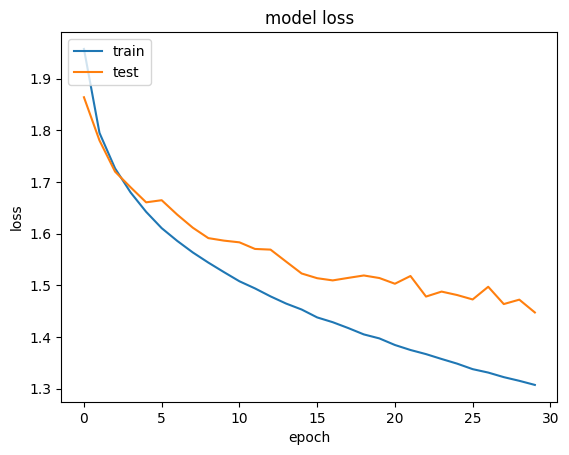

Final Training Accuracy: 0.5410
Final Validation Accuracy: 0.4902
Final Training Loss: 1.3073
Final Validation Loss: 1.4476


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(3072,)))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습
# 5-1. 모델 컴파일
#from tensorflow.keras.optimizers import Adam
#adam_optimizer = Adam(learning_rate=0.001)
#md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


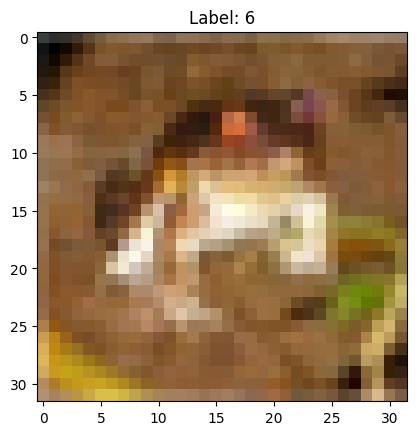

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - acc: 0.1946 - loss: 2.1883 - val_acc: 0.3304 - val_loss: 1.9105
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - acc: 0.2932 - loss: 1.9572 - val_acc: 0.3534 - val_loss: 1.8329
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - acc: 0.3276 - loss: 1.8796 - val_acc: 0.3712 - val_loss: 1.8048
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.3430 - loss: 1.8464 - val_acc: 0.3832 - val_loss: 1.7621
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.3577 - loss: 1.8148 - val_acc: 0.3927 - val_loss: 1.7483
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.3589 - loss: 1.8022 - val_acc: 0.3956 - val_loss: 1.7246
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.3716 - loss: 1.7741 - val_acc: 0.4121 - val_loss: 1.7045
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.3803 - loss: 1.7589 - val_acc: 0.4196 - val_loss: 1.6866
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/

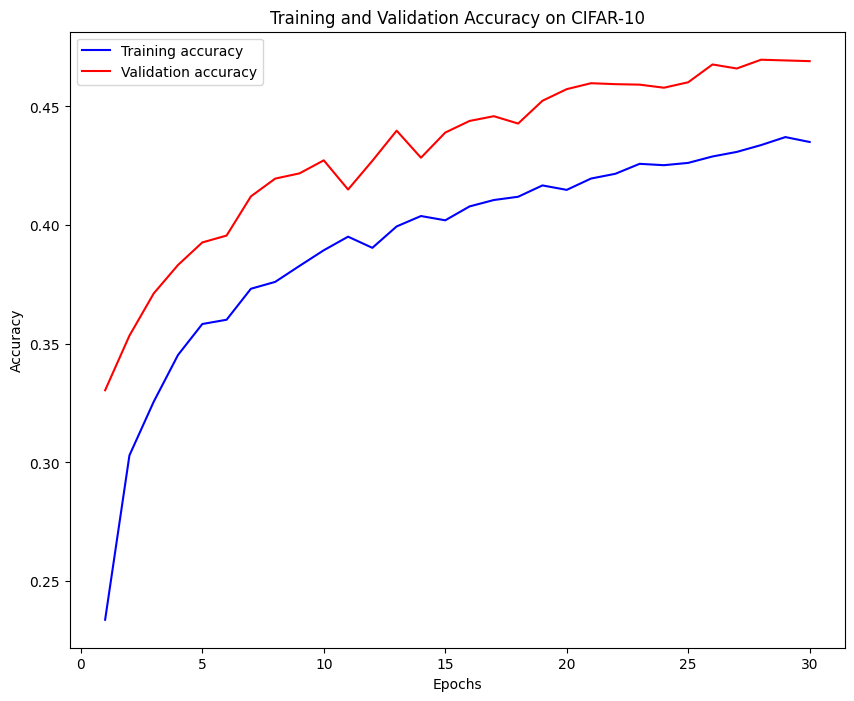

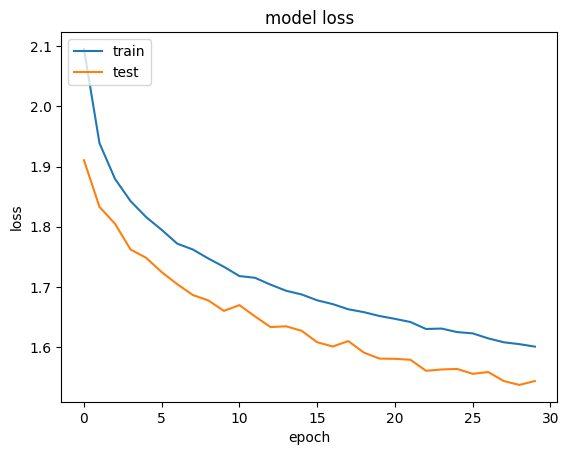

Final Training Accuracy: 0.4350
Final Validation Accuracy: 0.4691
Final Training Loss: 1.6009
Final Validation Loss: 1.5437


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(3072,)))
md.add(Dropout(0.5))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습
# 5-1. 모델 컴파일
#from tensorflow.keras.optimizers import Adam
#adam_optimizer = Adam(learning_rate=0.001)
#md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


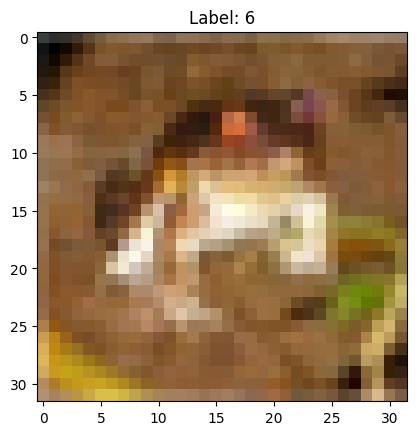

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.2242 - loss: 2.1185 - val_acc: 0.3338 - val_loss: 1.8793
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.3546 - loss: 1.8338 - val_acc: 0.3621 - val_loss: 1.8027
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.3812 - loss: 1.7548 - val_acc: 0.4042 - val_loss: 1.7072
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4123 - loss: 1.6851 - val_acc: 0.4029 - val_loss: 1.7209
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.4243 - loss: 1.6474 - val_acc: 0.4294 - val_loss: 1.6472
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.4340 - loss: 1.5993 - val_acc: 0.4370 - val_loss: 1.6235
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4514 - loss: 1.5714 - val_acc: 0.4352 - val_loss: 1.6092
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.4550 - loss: 1.5512 - val_acc: 0.4471 - val_loss: 1.5884
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - ac

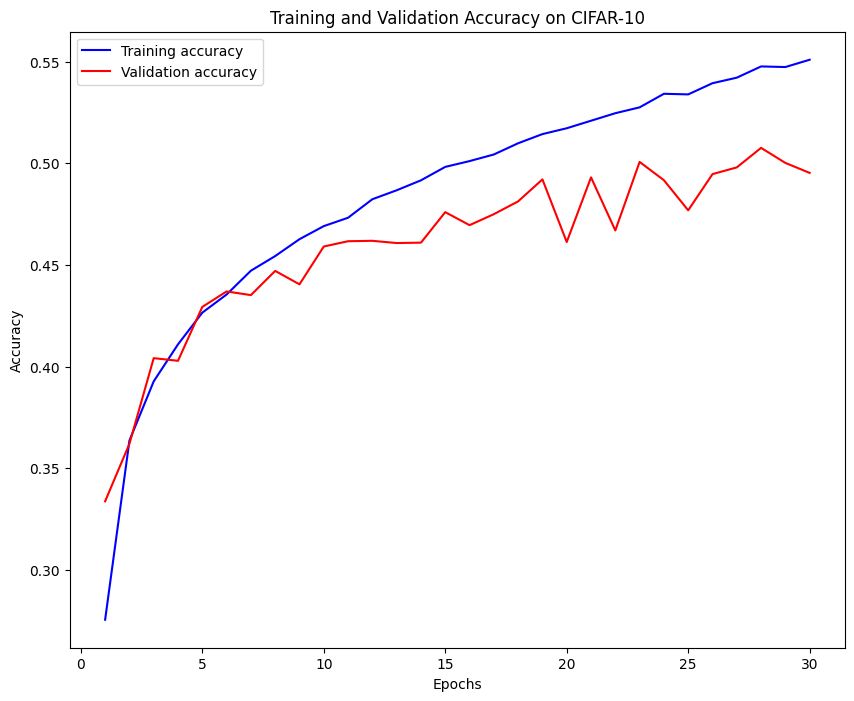

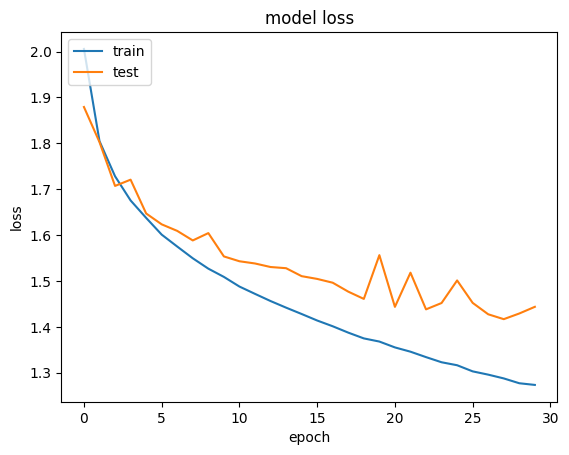

Final Training Accuracy: 0.5509
Final Validation Accuracy: 0.4953
Final Training Loss: 1.2734
Final Validation Loss: 1.4437


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(3072,)))
md.add(Dense(64, activation='relu'))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습
# 5-1. 모델 컴파일
#from tensorflow.keras.optimizers import Adam
#adam_optimizer = Adam(learning_rate=0.001)
#md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


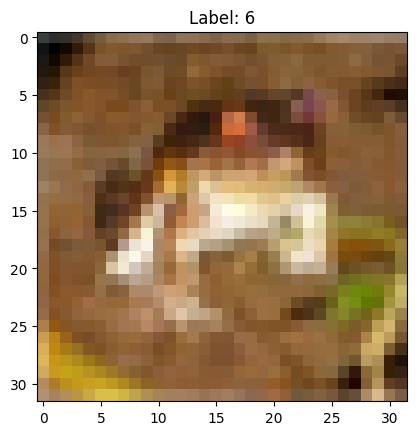

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.1808 - loss: 2.2156 - val_acc: 0.3087 - val_loss: 1.9901
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.2811 - loss: 1.9846 - val_acc: 0.3401 - val_loss: 1.8793
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - acc: 0.3151 - loss: 1.9164 - val_acc: 0.3659 - val_loss: 1.8124
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.3350 - loss: 1.8625 - val_acc: 0.3813 - val_loss: 1.7641
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.3506 - loss: 1.8324 - val_acc: 0.3943 - val_loss: 1.7292
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - acc: 0.3577 - loss: 1.7989 - val_acc: 0.3992 - val_loss: 1.7196
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.3705 - loss: 1.7748 - val_acc: 0.4041 - val_loss: 1.6882
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - acc: 0.3776 - loss: 1.7525 - val_acc: 0.4055 - val_loss: 1.6873
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms

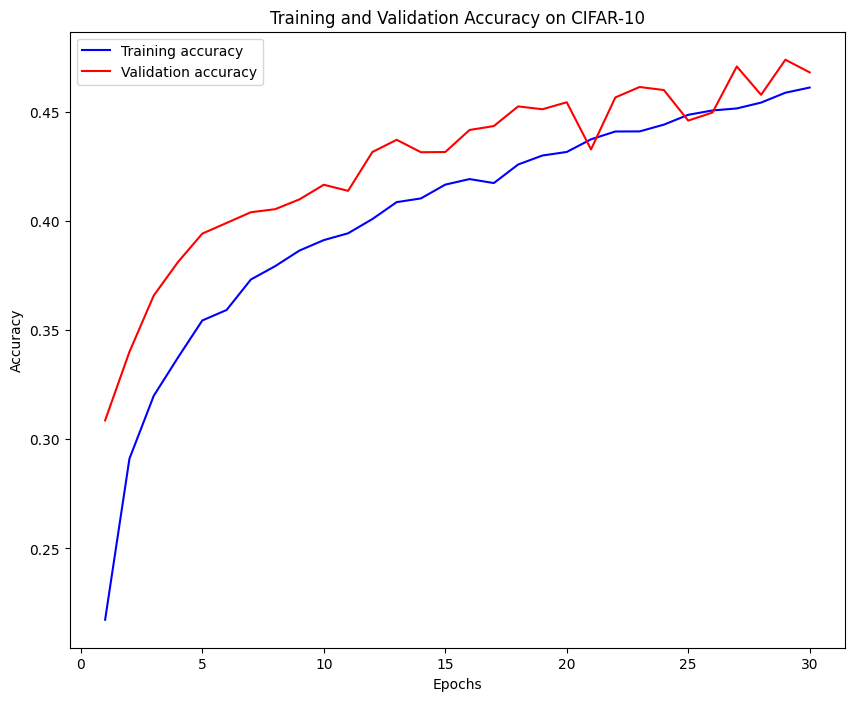

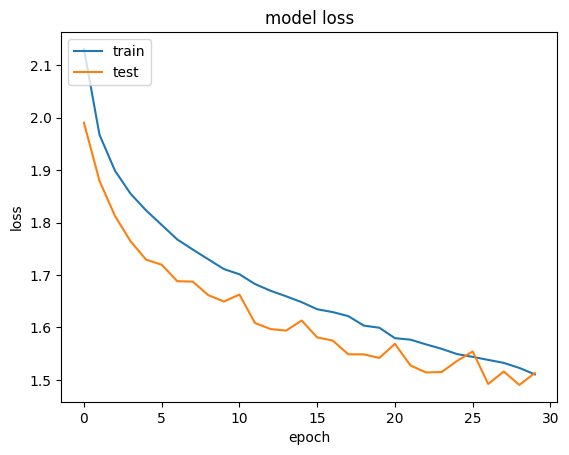

Final Training Accuracy: 0.4613
Final Validation Accuracy: 0.4682
Final Training Loss: 1.5105
Final Validation Loss: 1.5131


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(3072,)))
md.add(Dense(64, activation='relu'))
md.add(Dropout(0.5))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습
# 5-1. 모델 컴파일
#from tensorflow.keras.optimizers import Adam
#adam_optimizer = Adam(learning_rate=0.001)
#md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


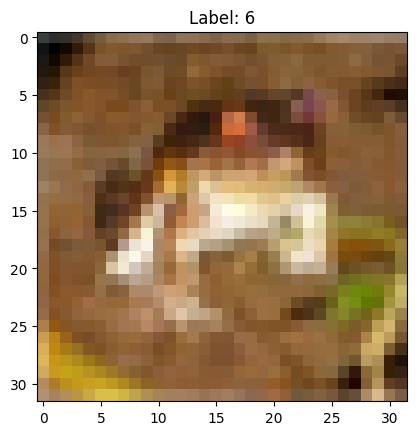

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,010 (1.54 MB)

 Trainable params: 404,010 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.2194 - loss: 2.1267 - val_acc: 0.3099 - val_loss: 1.9483
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.3341 - loss: 1.8660 - val_acc: 0.3651 - val_loss: 1.7948
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - acc: 0.3698 - loss: 1.7645 - val_acc: 0.3791 - val_loss: 1.7597
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.3917 - loss: 1.7085 - val_acc: 0.3914 - val_loss: 1.7273
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.4041 - loss: 1.6625 - val_acc: 0.4156 - val_loss: 1.6682
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.4182 - loss: 1.6340 - val_acc: 0.4088 - val_loss: 1.6550
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.4309 - loss: 1.5948 - val_acc: 0.4262 - val_loss: 1.6253
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.4369 - loss: 1.5762 - val_acc: 0.4193 - val_loss: 1.6352
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - ac

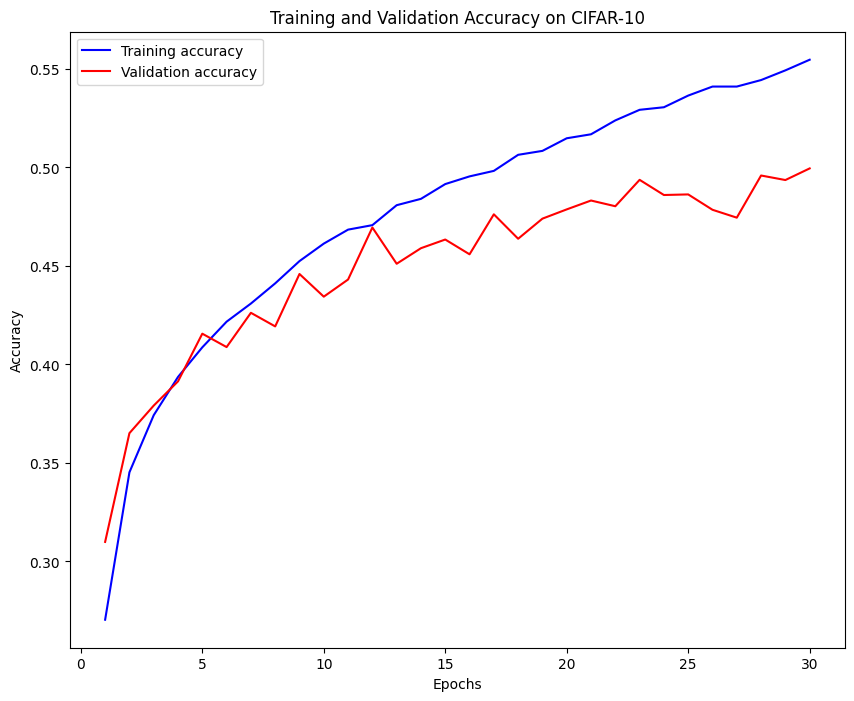

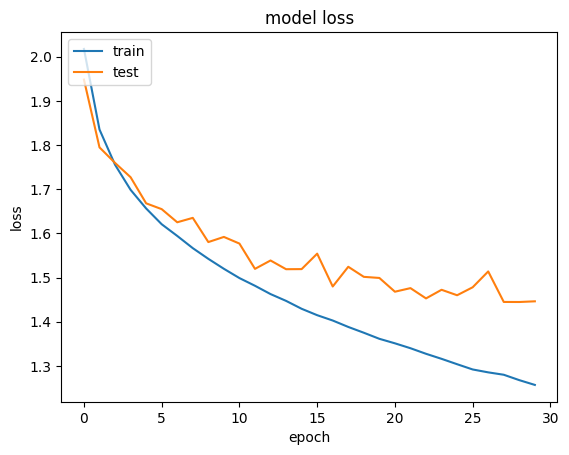

Final Training Accuracy: 0.5547
Final Validation Accuracy: 0.4995
Final Training Loss: 1.2570
Final Validation Loss: 1.4463


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(3072,)))
md.add(Dense(64, activation='relu'))
md.add(Dense(32, activation='relu'))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습
# 5-1. 모델 컴파일
#from tensorflow.keras.optimizers import Adam
#adam_optimizer = Adam(learning_rate=0.001)
#md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


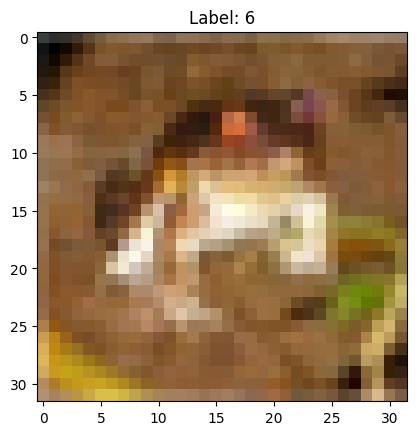

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - acc: 0.1828 - loss: 2.1974 - val_acc: 0.3236 - val_loss: 1.9427
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.2787 - loss: 1.9875 - val_acc: 0.3431 - val_loss: 1.8549
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.3091 - loss: 1.9054 - val_acc: 0.3646 - val_loss: 1.8184
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.3249 - loss: 1.8624 - val_acc: 0.3757 - val_loss: 1.7871
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.3477 - loss: 1.8308 - val_acc: 0.3874 - val_loss: 1.7451
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - acc: 0.3529 - loss: 1.8015 - val_acc: 0.3984 - val_loss: 1.7148
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - acc: 0.3697 - loss: 1.7739 - val_acc: 0.4079 - val_loss: 1.6879
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - acc: 0.3763 - loss: 1.7689 - val_acc: 0.4023 - val_loss: 1.6932
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - ac

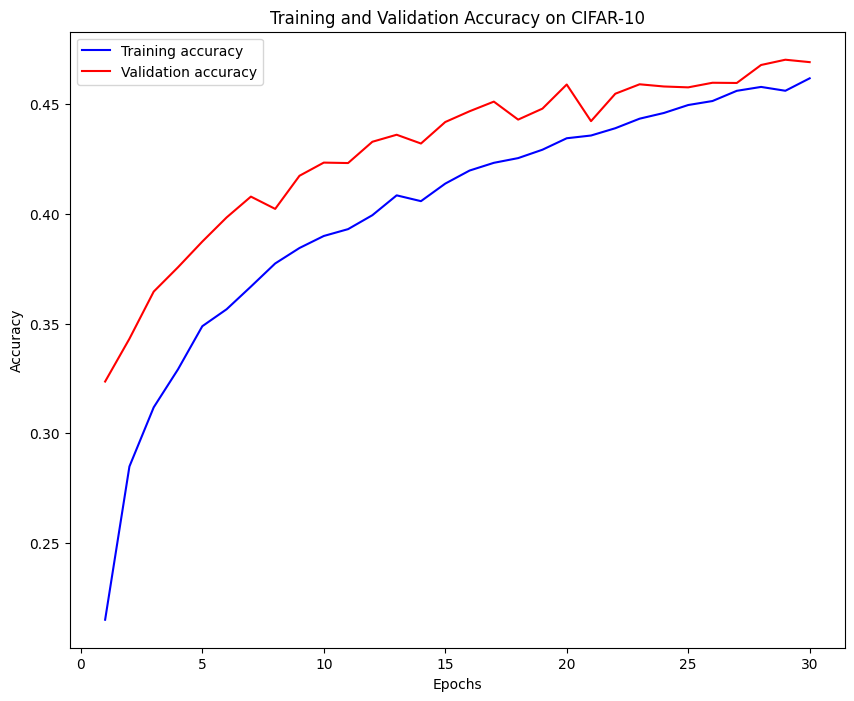

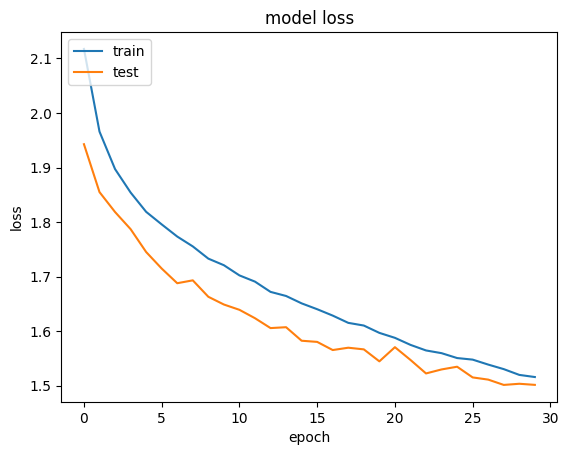

Final Training Accuracy: 0.4618
Final Validation Accuracy: 0.4692
Final Training Loss: 1.5159
Final Validation Loss: 1.5016


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(3072,)))
md.add(Dense(64, activation='relu'))
md.add(Dropout(0.5))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습
# 5-1. 모델 컴파일
#from tensorflow.keras.optimizers import Adam
#adam_optimizer = Adam(learning_rate=0.001)
#md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


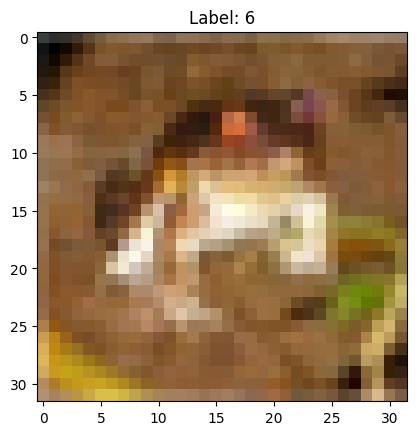

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,250 (1.53 MB)

 Trainable params: 402,250 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.1829 - loss: 2.1933 - val_acc: 0.2840 - val_loss: 1.9653
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - acc: 0.2773 - loss: 1.9662 - val_acc: 0.3335 - val_loss: 1.8411
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - acc: 0.3103 - loss: 1.8935 - val_acc: 0.3599 - val_loss: 1.7923
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - acc: 0.3312 - loss: 1.8583 - val_acc: 0.3607 - val_loss: 1.7827
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - acc: 0.3415 - loss: 1.8230 - val_acc: 0.3656 - val_loss: 1.7739
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.3532 - loss: 1.7976 - val_acc: 0.3719 - val_loss: 1.7390
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - acc: 0.3695 - loss: 1.7649 - val_acc: 0.4012 - val_loss: 1.6746
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 0.3730 - loss: 1.7544 - val_acc: 0.3991 - val_loss: 1.6850
Epoch 9/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/s

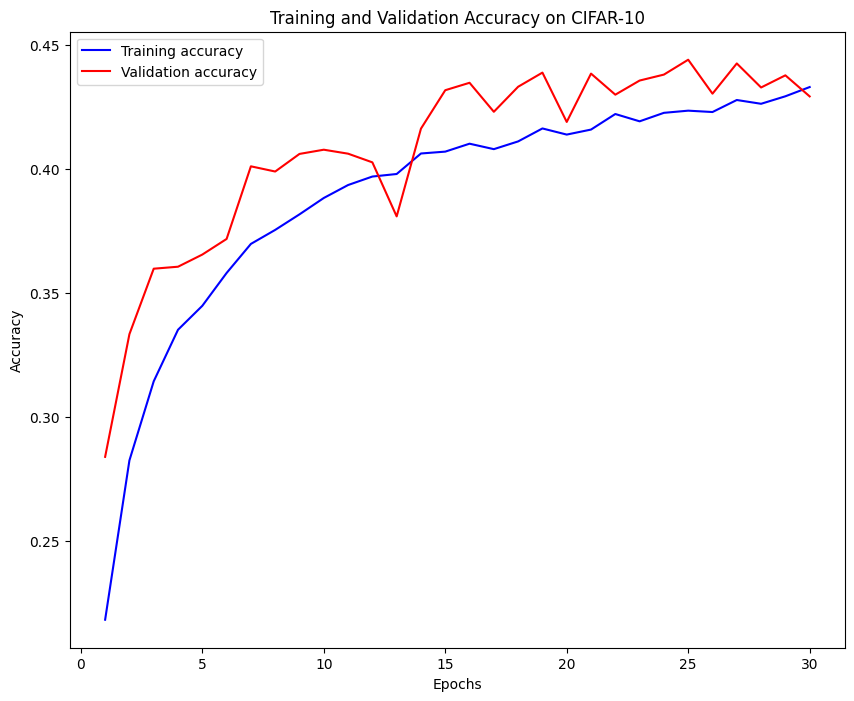

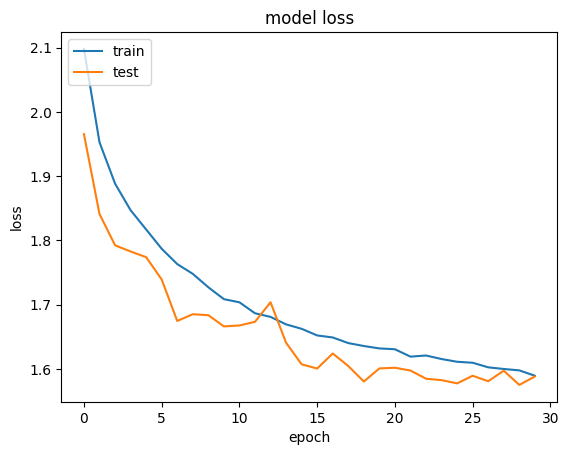

Final Training Accuracy: 0.4332
Final Validation Accuracy: 0.4294
Final Training Loss: 1.5893
Final Validation Loss: 1.5881


In [ ]:
# 1. 기본 라이브러리 불러오기
import numpy as np
import pandas as pd

# 2. CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape)
print("Test :", test_x.shape, test_y.shape)

# 2-2. 이미지 확인하기
import matplotlib.pyplot as plt
from PIL import Image

img = train_x[0]
img1 = Image.fromarray(img)
plt.imshow(img1)
plt.title(f"Label: {train_y[0][0]}")
plt.show()

# 3. 데이터 전처리
# 3-1. 입력 형태 변환 : 4차원 -> 2차원 (32*32*3 = 3072)
train_x1 = train_x.reshape(50000, -1)
test_x1 = test_x.reshape(10000, -1)

# 3-2. 데이터 값 정규화 (0~1)
train_x2 = train_x1 / 255.0
test_x2 = test_x1 / 255.0

# 4. 모델 설정
# 4-1. 모델 설정용 라이브러리 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 4-2. 모델 설정
md = Sequential()
md.add(Dense(128, activation='relu', input_shape=(3072,)))
md.add(Dense(64, activation='relu'))
md.add(Dropout(0.5))
md.add(Dense(10, activation='softmax')) # 선형분류이므로 마지막 층은 softmax로 활성화
md.summary() # 모델 요약

# 5. 모델 학습
# 5-1. 모델 컴파일
from tensorflow.keras.optimizers import Adam
adam_optimizer = Adam(learning_rate=0.001)
md.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
#md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
hist = md.fit(train_x2, train_y, epochs=30, batch_size = 64, validation_split=0.2)

md.evaluate(test_x2, test_y)

weight = md.get_weights()
weight


# 6. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(10,8))
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# model loss 시각화
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

Train: (50000, 32, 32, 3) (50000, 1)
Test : (10000, 32, 32, 3) (10000, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 105ms/step - acc: 0.1117 - loss: 2.2999 - val_acc: 0.1988 - val_loss: 2.2607
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - acc: 0.1866 - loss: 2.2195 - val_acc: 0.2466 - val_loss: 2.0341
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - acc: 0.2434 - loss: 2.0387 - val_acc: 0.2938 - val_loss: 1.9430
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 104ms/step - acc: 0.2859 - loss: 1.9491 - val_acc: 0.3347 - val_loss: 1.8188
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 108ms/step - acc: 0.3222 - loss: 1.8508 - val_acc: 0.3753 - val_loss: 1.7324
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 107ms/step - acc: 0.3559 - loss: 1.7545 - val_acc: 0.3941 - val_loss: 1.6841
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - acc: 0.3924 - loss: 1.6662 - val_acc: 0.4339 - val_loss: 1.5610
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - acc: 0.4172 - loss: 1.6070 - val_acc: 0.4560 - val_loss: 1.5272
Epoch 9/30
625/625 ━━━━━━━━━━━━━

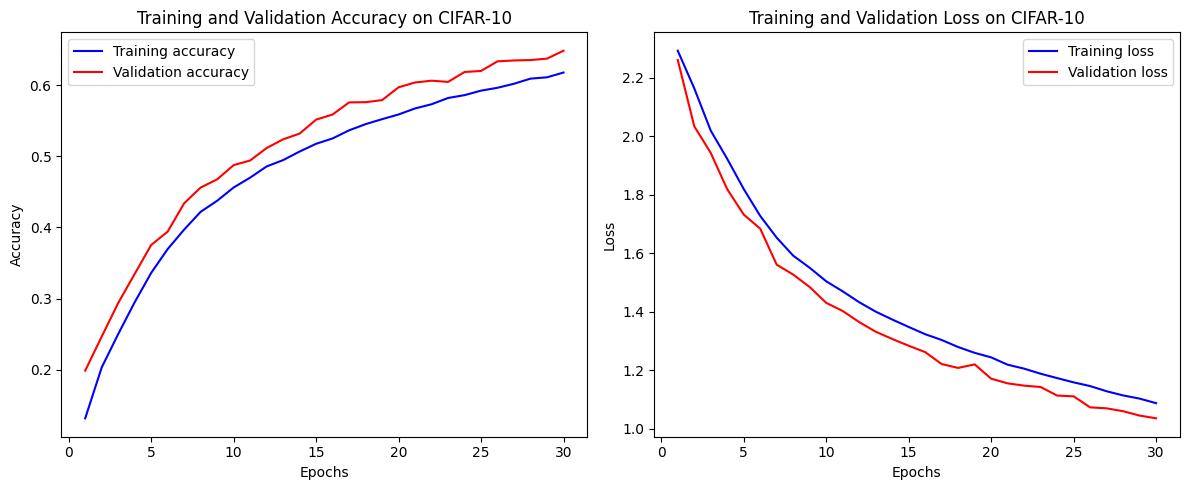

Final Training Accuracy: 0.6176
Final Validation Accuracy: 0.6482
Final Training Loss: 1.0879
Final Validation Loss: 1.0360


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping 추가

# 2. CIFAR-10 데이터셋 불러오기
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

# 2-1. 데이터 확인하기
print("Train:", train_x.shape, train_y.shape) # (50000, 32, 32, 3)
print("Test :", test_x.shape, test_y.shape)   # (10000, 32, 32, 3)

# 2-2. 이미지 확인하기
# (이 부분은 이전과 동일하게 유지됩니다.)
# img = train_x[0]
# img1 = Image.fromarray(img)
# plt.imshow(img1)
# plt.title(f"Label: {train_y[0][0]}")
# plt.show()

# ---
# 3. 데이터 전처리 (CNN을 위해 변경)
# 3-1. 입력 형태 변환: CNN은 4차원 형태를 그대로 사용합니다.
#      (train_x, test_x)는 이미 (데이터 수, 높이, 너비, 채널)의 4차원 형태이므로 변경 필요 없음
# 3-2. 데이터 값 정규화 (0~1)
train_x_normalized = train_x / 255.0
test_x_normalized = test_x / 255.0

# 4. 모델 설정 (CNN 모델로 변경)
md = Sequential()

# 첫 번째 컨볼루션 블록
md.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
md.add(MaxPooling2D((2, 2)))

# 두 번째 컨볼루션 블록
md.add(Conv2D(64, (3, 3), activation='relu'))
md.add(MaxPooling2D((2, 2)))

# 세 번째 컨볼루션 블록 (예시: 3-layer 구조라고 가정)
md.add(Conv2D(128, (3, 3), activation='relu'))
md.add(MaxPooling2D((2, 2))) # 선택 사항: 마지막 Conv 이후에도 풀링 가능

# Fully Connected Layer로 연결하기 위해 4차원 데이터를 1차원으로 평탄화
md.add(Flatten())

# Dropout 추가 (과적합 방지)
md.add(Dropout(0.5))

# Dense Layer
md.add(Dense(128, activation='relu'))
md.add(Dense(10, activation='softmax')) # 10개 클래스 분류

md.summary() # 모델 요약

# ---
# 5. 모델 학습
# 5-1. 모델 컴파일
# Adam 옵티마이저는 그대로 사용합니다. (learning_rate를 0.001로 명시하는 것이 좋습니다)
#adam_optimizer = Adam(learning_rate=0.001)
#md.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['acc'])
md.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['acc'])

# 5-2. 학습 수행
# 조기 종료 (Early Stopping) 콜백 추가
# monitor: 'val_loss' (검증 손실을 모니터링), patience: 10 (10 에포크 동안 개선이 없으면 중지)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

hist = md.fit(train_x_normalized, train_y,
              epochs=30, # 에포크를 충분히 크게 설정하여 조기 종료가 작동하도록 합니다.
              batch_size=64,
              validation_split=0.2,
              callbacks=[early_stopping]) # EarlyStopping 콜백 추가

# ---
# 6. 모델 평가
loss, acc = md.evaluate(test_x_normalized, test_y)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# ---
# 7. 학습 결과 시각화
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epoch = np.arange(1, len(acc)+1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epoch, acc, 'b', label='Training accuracy')
plt.plot(epoch, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss on CIFAR-10')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {hist.history['acc'][-1]:.4f}")
print(f"Final Validation Accuracy: {hist.history['val_acc'][-1]:.4f}")
print(f"Final Training Loss: {hist.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {hist.history['val_loss'][-1]:.4f}")

**Reasoning**:
Identify the hyperparameters and define their search spaces based on the existing code and common practices.

